<a href="https://colab.research.google.com/github/sr781/Data-Project---Factors-Potentially-Affecting-House-Prices-In-The-UK/blob/main/Final_Project_Sulav.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Factors Potentially Affecting House Prices In The UK**

The goal of this project is to identify trends for the factors affecting housing prices in the UK.

> Indented block



<br/>

I utilised three data sources for this project with first one was from the Office for National Statistics government website. It depicts the average UK house price from January 2005 to June 2023 When clicking the link below, download the data for Figure 2 in .csv format.

https://www.ons.gov.uk/economy/inflationandpriceindices/bulletins/housepriceindex/march2023


<br/>

The second data source is also from the Office for National Statistics. It depicts immigration, emigration, and net migration from June 2012 to June 2023 in quarterly updates. When clicking the link below, download the dataset with the year ending June 2023. Since it is a .xlsx file, open it after downloading, select table one, and save it as a  .csv file.

https://www.ons.gov.uk/peoplepopulationandcommunity/populationandmigration/internationalmigration/datasets/longterminternationalimmigrationemigrationandnetmigrationflowsprovisional

<br/>

The third and final data source is the private rental price percentage change over 12 months for countries of the UK, January 2012 to January 2024. Download the .csv file in figure 2.

https://www.ons.gov.uk/economy/inflationandpriceindices/bulletins/indexofprivatehousingrentalprices/january2024

**Outline of this notebook**



*   Extracting data from a Comma Seperated Value (CSV) file.
*   Transform
*   Data visualisation
*   Conclusions





**Import dependencies**

In [89]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.stats import linregress



# **Extracting Data From A CSV File And Exploratory Data Analysis**

In the following section, the various dataset will be checked to see if it is formatted properly before being loaded into a dataframe. Exploratory data analysis will also be undertaken to find out more about the data



**Average UK House Prices Data**


In [90]:
f = open("/content/Figure_2__The_average_UK_house_price_was_£288,000_in_June_2023_(provisional_estimate)_.csv") #To check the first few lines of the data
for i in range(10):
    line = f.readline()
    print('line: ', i, line)
f.close()


line:  0 "Figure 2: The average UK house price was £288,000 in June 2023 (provisional estimate) ",

line:  1 "Average house price, UK, January 2005 to June 2023  ",

line:  2 ,

line:  3 Notes,"1. Not seasonally adjusted.

line:  4 2. [HMLR's UK House Price Index (HPI) release on GOV.UK](https://www.gov.uk/government/collections/uk-house-price-index-reports) is available to download."

line:  5 Unit,£

line:  6 ,

line:  7 ,UK average house price

line:  8 2005 Jan,150633

line:  9 2005 Feb,150488



Sometimes the data can have a bunch of information in the first few lines. It can be seen that the average house price dataset is not formatted correctly till line 7 so when reading into a dataframe, skip the first 6 rows otherwise there will be errors later on when processing the data

In [91]:
df_av_uk_house_prices_2005_2023 = pd.read_csv('/content/Figure_2__The_average_UK_house_price_was_£288,000_in_June_2023_(provisional_estimate)_.csv', skiprows=6) # Skip 6 rows so the data for the tables is read in

In [92]:
df_av_uk_house_prices_2005_2023.head() # View the first 5 rows of data

,Unnamed: 0,UK average house price
0,2005 Jan,150633
1,2005 Feb,150488
2,2005 Mar,151723
3,2005 Apr,153880
4,2005 May,155533


The data above has now been formatted correctly and appears whole in the dataframe since the information above the set is omitted when it is read. The unnamed column will be renamed as well as the 'UK average house price' to include the pound sign.

In [93]:
df_av_uk_house_prices_2005_2023.isnull().sum() # Check for any null values in the DataSet

Unnamed: 0                0
UK average house price    0
dtype: int64

In [94]:
df_av_uk_house_prices_2005_2023.dtypes # Check the data type for each column

Unnamed: 0                object
UK average house price     int64
dtype: object

The date column which is currently unnamed is an object. It needs to be converted to 'datetime64' so it formats correctly on the graph

In [95]:
df_av_uk_house_prices_2005_2023.shape

(222, 2)

In [96]:
df_av_uk_house_prices_2005_2023.tail()

,Unnamed: 0,UK average house price
217,2023 Feb,285648
218,2023 Mar,283635
219,2023 Apr,285010
220,2023 May,285546
221,2023 Jun,287546


It can be seen that there are no null values, the dates (column currently unnamed) is an object whereas the UK average house price column is an integer. There are also two columns with 222 rows. Using the `.head()` and `.tail()` functions we can confirm data is from January 2005 to June 2023.  

**Migration Data**


In [97]:
f = open("/content/june23ltimaccessible.csv") #To check the first few lines of the data
for i in range(10):
    line = f.readline()
    print('line: ', i, line)
f.close()

line:  0 "Table 1: Long-term international migration into and out of the United Kingdom by nationality,",,,,,,,,,

line:  1 using new approach to producing migration estimates.,,,,,,,,,

line:  2 This worksheet contains one table. Freeze panes is turned on. ,,,,,,,,,

line:  3 "To turn off freeze panes select the 'View' ribbon then 'Freeze Panes' then 'Unfreeze Panes' or use [Alt W, F]",,,,,,,,,

line:  4 Flow,Period,All Nationalities,British,EU,Non-EU,,,,

line:  5 Immigration,YE Jun 12,"639,000","74,000","327,000","238,000",,,,

line:  6 Immigration,YE Sep 12,"630,000","76,000","322,000","232,000",,,,

line:  7 Immigration,YE Dec 12,"643,000","79,000","334,000","230,000",,,,

line:  8 Immigration,YE Mar 13,"649,000","75,000","350,000","224,000",,,,

line:  9 Immigration,YE Jun 13,"669,000","75,000","373,000","222,000",,,,



Like with a lot of data tables, the first 3 lines contain information that will mess up the data when it is read into a dataframe. So skip the first 4 rows.

In [98]:
df_migration_2012_2023 = pd.read_csv("/content/june23ltimaccessible.csv", skiprows=4) # First few rows are not in the corrrect format, so skip it

In [99]:
df_migration_2012_2023.head()

,Flow,Period,All Nationalities,British,EU,Non-EU,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Immigration,YE Jun 12,"639,000","74,000","327,000","238,000",NaN,NaN,NaN,NaN
1,Immigration,YE Sep 12,"630,000","76,000","322,000","232,000",NaN,NaN,NaN,NaN
2,Immigration,YE Dec 12,"643,000","79,000","334,000","230,000",NaN,NaN,NaN,NaN
3,Immigration,YE Mar 13,"649,000","75,000","350,000","224,000",NaN,NaN,NaN,NaN
4,Immigration,YE Jun 13,"669,000","75,000","373,000","222,000",NaN,NaN,NaN,NaN


There seems to be some unexpected extra unamed columns all filled with null values which will need to be removed in the next section.

In [100]:
df_migration_2012_2023.isnull().sum() #Checking for null values

Flow                   0
Period                 0
All Nationalities      0
British                0
EU                     0
Non-EU                 0
Unnamed: 6           135
Unnamed: 7           135
Unnamed: 8           135
Unnamed: 9           135
dtype: int64

In [101]:
df_migration_2012_2023.shape #How many rows and columns are there?

(135, 10)

In [102]:
df_migration_2012_2023.dtypes

Flow                  object
Period                object
All Nationalities     object
British               object
EU                    object
Non-EU                object
Unnamed: 6           float64
Unnamed: 7           float64
Unnamed: 8           float64
Unnamed: 9           float64
dtype: object

The column 'All Nationalities' needs to be an 'int64' not an object so it can be correctly plotted on a graph. Also, the 'Period' needs to be a 'datetime64' not 'object' for the same reason

In [103]:
print(df_migration_2012_2023['Flow'].unique()) # Obtain unique objects in the 'Flow' column

['Immigration' 'Emigration' 'Net']


The dataset contains data for immigration, emmigration and net migration. We only need the data for net migration which will be done in the next section.

**Annual rental price inflation as a percentage**

In [104]:
f = open("/content/Figure_2__Annual_rental_price_inflation_was_higher_in_Wales_than_in_England_and_Scotland.csv") #To check the first few lines of the data
for i in range(15):
    line = f.readline()
    print('line: ', i, line)
f.close()

line:  0 "Figure 2: Annual rental price inflation was higher in Wales than in England and Scotland",""

line:  1 "Private rental price percentage change over 12 months for countries of the UK, January 2012 to January 2024",""

line:  2 "",""

line:  3 "Notes","1.  Data presented are classified as [official statistics in development](https://www.ons.gov.uk/methodology/methodologytopicsandstatisticalconcepts/guidetoofficialstatisticsindevelopment). Estimates are not seasonally adjusted. More information is available in [Section 8: Strengths and Limitations](https://www.ons.gov.uk/economy/inflationandpriceindices/bulletins/indexofprivatehousingrentalprices/january2024#strengths-and-limitations). 

line:  4 

line:  5 2.  Northern Ireland data are currently available up to November 2023. Updated data will be used to revise UK estimates when available.  

line:  6 

line:  7 3.  The [Cost of Living (Tenant Protection) Scotland Act](https://www.parliament.scot/bills-and-laws/bills/cost-of-li

The first 10 lines of this file is the information of the dataset, it will need to be ommited or will cause problems when reading into a dataframe.

In [105]:
df_rental_price_inflation = pd.read_csv("/content/Figure_2__Annual_rental_price_inflation_was_higher_in_Wales_than_in_England_and_Scotland.csv", skiprows=6)

In [106]:
df_rental_price_inflation.head()

,Unnamed: 0,England,Wales,Scotland,Northern Ireland
0,Jan 2012,2.8,1.3,1.4,NaN
1,Feb 2012,2.9,1.3,1.5,NaN
2,Mar 2012,2.8,1.0,1.5,NaN
3,Apr 2012,2.9,0.7,1.3,NaN
4,May 2012,3.0,0.7,1.2,NaN


In [107]:
df_rental_price_inflation.dtypes

Unnamed: 0           object
England             float64
Wales               float64
Scotland            float64
Northern Ireland    float64
dtype: object

The date column is currently unnamed so that will need to be fixed, the values in the same column are an 'object' but will need to be changed to 'datetime64' so it formats correctly in a plot. Furthermore to get the average rental price inflation for the UK, the averages of the column 'England', 'Wales', 'Scotland' and 'Northern Ireland' (excluding the null values a data for that region was collected only later) and place the values in a seperate column

In [108]:
df_rental_price_inflation.shape

(145, 5)

In [109]:
df_rental_price_inflation.isnull().sum()

Unnamed: 0           0
England              0
Wales                0
Scotland             0
Northern Ireland    50
dtype: int64

The first 50 rows for the 'Northern Ireland' column are null values, the rest of the data is fine

In [110]:
df_rental_price_inflation.tail()

,Unnamed: 0,England,Wales,Scotland,Northern Ireland
140,Sep 2023,5.6,6.9,6.0,9.1
141,Oct 2023,6.0,6.9,6.2,9.3
142,Nov 2023,6.1,7.3,6.2,9.5
143,Dec 2023,6.1,7.1,6.3,NaN
144,Jan 2024,6.1,7.0,6.8,NaN


The last two rows for 'Northern Ireland' are also null values

# Transform

Transforming a dataset refers to the process of modifying or altering the structure, content, or representation of the data to better suit the needs of analysis, visualisation, modeling, or any other specific purpose.

**Average UK House Prices Data**

As seen in the exploratory data analysis section there are a bunch of changes that will need to be:


1.   Column 'Unnamed: 0' is to be renamed to 'Date' .
2.   Date formatting from an 'object' to 'datetime64' format








In [111]:
df_av_uk_house_prices_2005_2023.rename(columns={'Unnamed: 0': 'Date'}, inplace=True) #Renamed the unnamed column
df_av_uk_house_prices_2005_2023.head()

,Date,UK average house price
0,2005 Jan,150633
1,2005 Feb,150488
2,2005 Mar,151723
3,2005 Apr,153880
4,2005 May,155533


In [114]:
# Convert 'dates' column to datetime format with format='%Y %b'
df_av_uk_house_prices_2005_2023['Date'] = pd.to_datetime(df_av_uk_house_prices_2005_2023['Date'], format='%Y %b')

# Show the changes to confirm
df_av_uk_house_prices_2005_2023.head()




,Date,UK average house price
0,2005-01-01,150633
1,2005-02-01,150488
2,2005-03-01,151723
3,2005-04-01,153880
4,2005-05-01,155533


In [115]:
df_av_uk_house_prices_2005_2023.tail() # All 222 rows have been updated

,Date,UK average house price
217,2023-02-01,285648
218,2023-03-01,283635
219,2023-04-01,285010
220,2023-05-01,285546
221,2023-06-01,287546


**Migration Data**

The following is a list of changes that will be made


1.   Remove the multiple unnamed columns filled with null values
2.   Change the column name 'Period' to 'Date' to match the other datasets
3.   In the renamed 'Date' column, reformat the date so it is 'datetime64' and not an 'object'
4.   As identified earlier the data is in three groups located in the 'Flow' column, which are 'Immigration', 'Emmigration' and 'Net'. Only the 'Net' migration figures are needed

5. Also the dataype for column 'All Nationalities' needs to be changed from an 'object' to an 'int64' so it can be correctly plot on a graph

In [116]:
df_migration_2012_2023.drop(columns=['Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9'], inplace=True) #Will drop the unnamed columns with the null values
df_migration_2012_2023.head()

,Flow,Period,All Nationalities,British,EU,Non-EU
0,Immigration,YE Jun 12,"639,000","74,000","327,000","238,000"
1,Immigration,YE Sep 12,"630,000","76,000","322,000","232,000"
2,Immigration,YE Dec 12,"643,000","79,000","334,000","230,000"
3,Immigration,YE Mar 13,"649,000","75,000","350,000","224,000"
4,Immigration,YE Jun 13,"669,000","75,000","373,000","222,000"


In [117]:
df_migration_2012_2023.rename(columns={'Period' : 'Date'}, inplace=True) # Rename 'Period' column to 'Date'

The data in the renamed 'Date' column will need to be reformatted so it shows month as (Jan, Feb, Mar, ...) and year as (2012, 2013, 2014 ...)

In [118]:
# Function to convert 'YE Mon YY' format to 'Month YYYY' and convert to datetime64 format
def convert_date(date_str):
    date_obj = pd.to_datetime(date_str.replace('YE ', '').replace(' P', ''), format='%b %y') # Removes the 'YE ' prefix and ' P' suffixes
    return date_obj

# Apply the function to the 'dates' column of df_migration_2012_2023
df_migration_2012_2023['Date'] = df_migration_2012_2023['Date'].apply(convert_date)

print(df_migration_2012_2023)

            Flow       Date All Nationalities  British        EU   Non-EU
0    Immigration 2012-06-01           639,000   74,000   327,000  238,000
1    Immigration 2012-09-01           630,000   76,000   322,000  232,000
2    Immigration 2012-12-01           643,000   79,000   334,000  230,000
3    Immigration 2013-03-01           649,000   75,000   350,000  224,000
4    Immigration 2013-06-01           669,000   75,000   373,000  222,000
..           ...        ...               ...      ...       ...      ...
130          Net 2022-06-01           607,000   20,000  -133,000  720,000
131          Net 2022-09-01           709,000    6,000  -135,000  839,000
132          Net 2022-12-01           745,000   -4,000  -123,000  873,000
133          Net 2023-03-01           705,000   -9,000  -102,000  817,000
134          Net 2023-06-01           672,000  -10,000   -86,000  768,000

[135 rows x 6 columns]


We only need the data for the next migration. Luckily the column 'Flow' indicates which one is which so we can create a new dataframe that only has net values. The index will also be reset so it starts at '0'

In [119]:
df_migration_2012_2023 = df_migration_2012_2023.loc[df_migration_2012_2023['Flow'] == "Net"].reset_index() # Update the dataframe so only data that has a value of 'Net' in the 'Flow'
# column are accepted. Also reset the index so it begins at 0

df_migration_2012_2023.head()

,index,Flow,Date,All Nationalities,British,EU,Non-EU
0,90,Net,2012-06-01,"162,000","-83,000","187,000","57,000"
1,91,Net,2012-09-01,"157,000","-80,000","183,000","54,000"
2,92,Net,2012-12-01,"195,000","-72,000","206,000","61,000"
3,93,Net,2013-03-01,"204,000","-79,000","223,000","60,000"
4,94,Net,2013-06-01,"215,000","-83,000","242,000","56,000"


Remove the 'Flow ' and newly created 'Index' columns.

In [120]:
df_migration_2012_2023.drop(columns=['index', 'Flow'], inplace=True)
df_migration_2012_2023.head()

,Date,All Nationalities,British,EU,Non-EU
0,2012-06-01,"162,000","-83,000","187,000","57,000"
1,2012-09-01,"157,000","-80,000","183,000","54,000"
2,2012-12-01,"195,000","-72,000","206,000","61,000"
3,2013-03-01,"204,000","-79,000","223,000","60,000"
4,2013-06-01,"215,000","-83,000","242,000","56,000"


In [121]:
df_migration_2012_2023['All Nationalities']= pd.to_numeric(df_migration_2012_2023['All Nationalities'].replace(',', '', regex=True), errors='coerce')  #Remove any commas so it can be converted to int64

In [122]:
df_migration_2012_2023['All Nationalities'] = df_migration_2012_2023['All Nationalities'].astype('int64') #Convert all values in the 'All Nationalities' column from an object to int64

In [123]:
df_migration_2012_2023.dtypes #Check to see if the changes occured

Date                 datetime64[ns]
All Nationalities             int64
British                      object
EU                           object
Non-EU                       object
dtype: object

In [124]:
df_migration_2012_2023.head()

,Date,All Nationalities,British,EU,Non-EU
0,2012-06-01,162000,"-83,000","187,000","57,000"
1,2012-09-01,157000,"-80,000","183,000","54,000"
2,2012-12-01,195000,"-72,000","206,000","61,000"
3,2013-03-01,204000,"-79,000","223,000","60,000"
4,2013-06-01,215000,"-83,000","242,000","56,000"


**Annual rental price inflation as a percentage**

The following changes were identified in the previous section:


1.   Column 'Unnamed: 0' needs to be renamed to 'Date'.
2.   The to be named 'Unnamed: 0' column is an object and should be reformatted to 'datetime64'.
3.  A new column called 'UK' needs to be created containing the averages of the column 'England', 'Wales', 'Scotland' and 'Northern Ireland' (excluding the null values a data for that region was collected only later).



In [125]:
df_rental_price_inflation.rename(columns={'Unnamed: 0': 'Date'}, inplace=True) #Renamed the unnamed column
df_rental_price_inflation.head()

,Date,England,Wales,Scotland,Northern Ireland
0,Jan 2012,2.8,1.3,1.4,NaN
1,Feb 2012,2.9,1.3,1.5,NaN
2,Mar 2012,2.8,1.0,1.5,NaN
3,Apr 2012,2.9,0.7,1.3,NaN
4,May 2012,3.0,0.7,1.2,NaN


In [126]:
# Convert 'dates' column to datetime format with format='%Y %b'
df_rental_price_inflation['Date'] = pd.to_datetime(df_rental_price_inflation['Date'], format='%b %Y')

# Show the changes to confirm
df_rental_price_inflation.head()

,Date,England,Wales,Scotland,Northern Ireland
0,2012-01-01,2.8,1.3,1.4,NaN
1,2012-02-01,2.9,1.3,1.5,NaN
2,2012-03-01,2.8,1.0,1.5,NaN
3,2012-04-01,2.9,0.7,1.3,NaN
4,2012-05-01,3.0,0.7,1.2,NaN


In [127]:
df_rental_price_inflation.dtypes # Confirm the 'Date' column is 'datetime64' format

Date                datetime64[ns]
England                    float64
Wales                      float64
Scotland                   float64
Northern Ireland           float64
dtype: object

In [128]:
# Calculate the row-wise mean across the four columns and round to 1 decimal place
df_rental_price_inflation['UK'] = df_rental_price_inflation[['England', 'Wales', 'Scotland', 'Northern Ireland']].mean(axis=1, skipna=True).round(1) #Will find the mean column wise (axis=1) skipping null values
# and rounding to 1 decimal point

# Print the DataFrame to verify the changes
print(df_rental_price_inflation)

          Date  England  Wales  Scotland  Northern Ireland   UK
0   2012-01-01      2.8    1.3       1.4               NaN  1.8
1   2012-02-01      2.9    1.3       1.5               NaN  1.9
2   2012-03-01      2.8    1.0       1.5               NaN  1.8
3   2012-04-01      2.9    0.7       1.3               NaN  1.6
4   2012-05-01      3.0    0.7       1.2               NaN  1.6
..         ...      ...    ...       ...               ...  ...
140 2023-09-01      5.6    6.9       6.0               9.1  6.9
141 2023-10-01      6.0    6.9       6.2               9.3  7.1
142 2023-11-01      6.1    7.3       6.2               9.5  7.3
143 2023-12-01      6.1    7.1       6.3               NaN  6.5
144 2024-01-01      6.1    7.0       6.8               NaN  6.6

[145 rows x 6 columns]


# Data Visualisation

To visualise the data, it will be put in a line graph as it is the most approporate format for these data sets. Also to compare each graph, the date range needs to fit for all three graphs. This is between June 2012 to June 2023 which encompasses over 10 years worth of data.

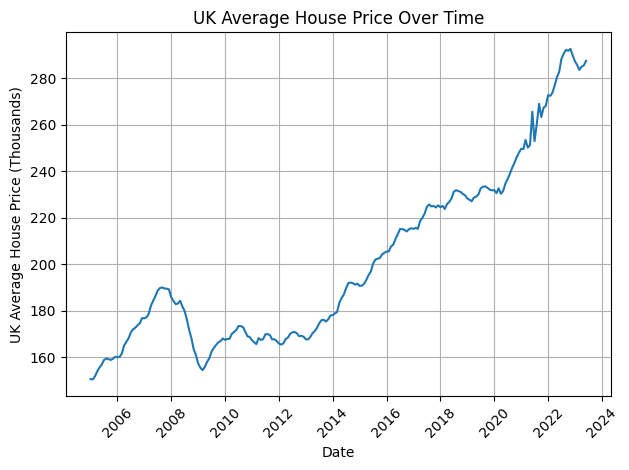

In [129]:
df_plot = df_av_uk_house_prices_2005_2023.copy() #Copy for the plot because otherwise the data in the dataframe will be divided

# Check if the maximum value of 'UK average house price' is greater than 1000
if not df_plot['UK average house price'].max() <= 1000:
    # Scale the uk average house prices to make it easier to read
    df_plot['UK average house price'] /= 1000

# Plot the data, with 'Date' in the x axis and 'UK average house price' in the y axis
plt.plot(df_plot['Date'], df_plot['UK average house price'], linestyle='-')

# Label the plot names
plt.title('UK Average House Price Over Time')
plt.xlabel('Date')
plt.ylabel('UK Average House Price (Thousands)')
plt.grid(True) # Add a grid to be able to better compare the graph

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**Key Takeaways:**

From the table above it can be seen that from roughly 2009 onwards, there is a rising trend in the house prices for the UK. From mid 2016 to mid 2020, the average price rises at a much shallower rate before continuing to increase until 2023.

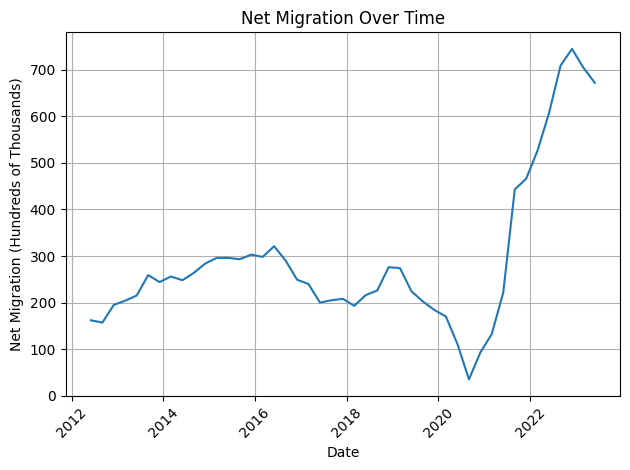

In [130]:
df_plot_migration = df_migration_2012_2023.copy()

# Check if the maximum value of 'All Nationalities' column is greater than 1000
if not df_plot_migration['All Nationalities'].max() <= 1000:
    # Scale the net migration to make it easier to read
    df_plot_migration['All Nationalities'] /= 1000

# Plot the data, where the y axis is net migration and the x axis are dates
plt.plot(df_plot_migration['Date'], df_plot_migration['All Nationalities'], linestyle='-')

# Label the plot names
plt.title('Net Migration Over Time')
plt.xlabel('Date')
plt.ylabel('Net Migration (Hundreds of Thousands)')
plt.grid(True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

**Key Takeaways:**

The first key takeaway from the table above is that for all years that the data was collected for, net migration has never been negative.

From mid 2012 to mid 2020, the net migration rises and falls showing no overall trends for those years. After mid 2020 however, the net migration skyrockets from rougly 50000 for that time to a peak of over 750000 for the end of 2022 before falling.

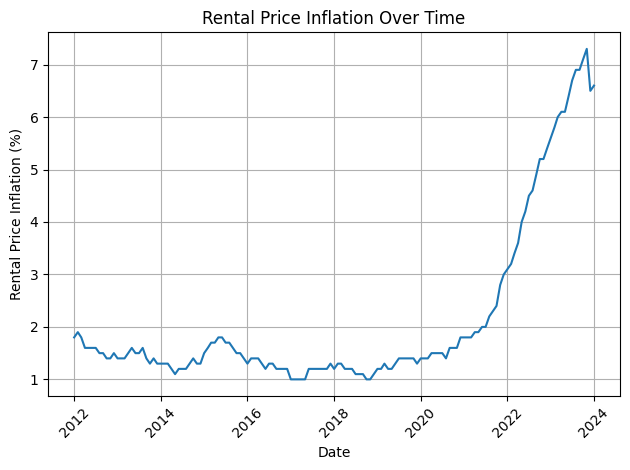

In [131]:
# Plot the data with 'UK' on the y-axis and 'Date' on the x-axis
plt.plot(df_rental_price_inflation['Date'], df_rental_price_inflation['UK'], linestyle='-')

# Lable the plot names
plt.title('Rental Price Inflation Over Time')
plt.xlabel('Date')
plt.ylabel('Rental Price Inflation (%)')
plt.grid(True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

**Key Takeaways:**

From 2012 to late 2021, the rental price inflation is below 2% and above 1%. This shows a steady constant rise in the overall prices of rent in the UK. However after late 2021, it exceeds the 2% mark and skyrockets to just over 7.5% in the end of 2023 which is a very high figure.

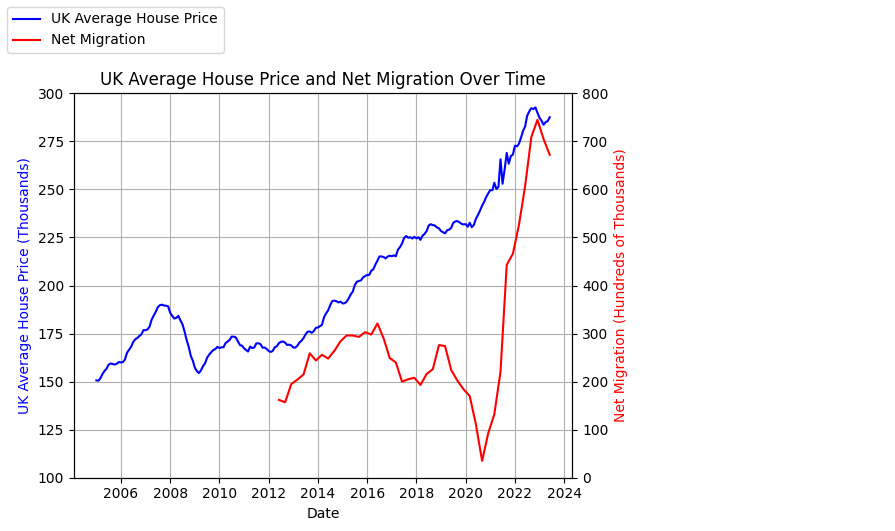

In [132]:
# Create figure and axis objects
fig, ax1 = plt.subplots()

# Plot the UK average house price data
ax1.plot(df_plot['Date'], df_plot['UK average house price'], color='blue', linestyle='-', label='UK Average House Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('UK Average House Price (Thousands)', color='blue')

# Create a twin y-axis for net migration
ax2 = ax1.twinx()
ax2.plot(df_plot_migration['Date'], df_plot_migration['All Nationalities'], color='red', linestyle='-', label='Net Migration')
ax2.set_ylabel('Net Migration (Hundreds of Thousands)', color='red')

# Adjust y-axis limits to ensure alignment for both data
ax1.set_ylim(100, 300)
ax2.set_ylim(0, 800)

# Add grid to better reference the graphs
ax1.grid(True)

# Add title
plt.title('UK Average House Price and Net Migration Over Time')

# Show legend
fig.legend(loc='upper left')
fig.legend(loc=(1.04, 1.0)) # Relocate the key so it doesn't block the graph

plt.tight_layout()
plt.show()

**Analysis and Takeaways**

From the dual axis plot where i have the uk average house price with net migration, it can be possible see some correlation.

As explained earlier net migration is always positive for the dataset and the periods from mid 2012 to mid 2016 both lines seem to have similar correlation as a rising trend.

From mid 2012 to mid 2020, the net migratiton is on a downwards trend and it can be seen that the uk average house price also rises at a shallower gradient during that time.

From mid 2020 to mid 2022, the net migration goes from roughly 50000 to a peak of 750000. The uk average house price at that similar time frame also increases at a much steaper gradiant. This is another correlation.


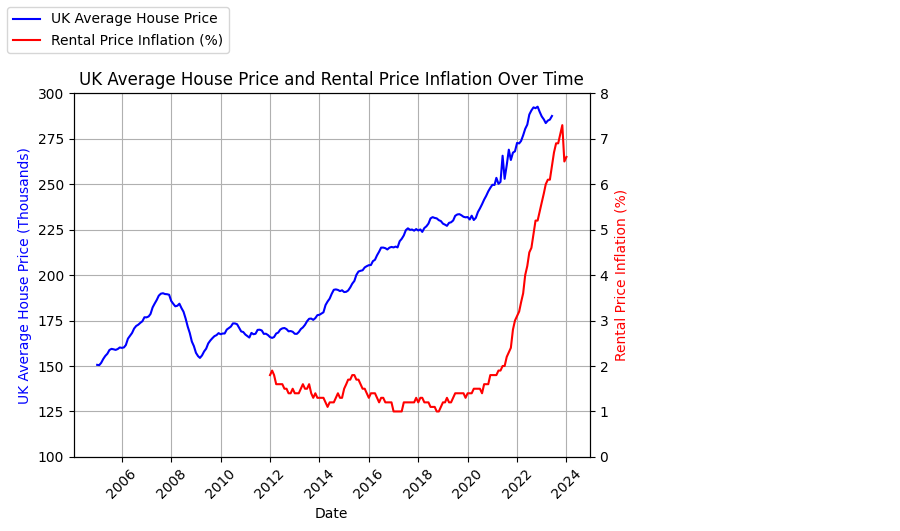

In [133]:
# Plot the data for UK average house price
fig, ax1 = plt.subplots()

# Plot UK average house price on the left y-axis
ax1.plot(df_plot['Date'], df_plot['UK average house price'], color='blue', linestyle='-', label='UK Average House Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('UK Average House Price (Thousands)', color='blue')
ax1.grid(True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Create a twin y-axis for rental price inflation
ax2 = ax1.twinx()
ax2.plot(df_rental_price_inflation['Date'], df_rental_price_inflation['UK'], color='red', linestyle='-', label='Rental Price Inflation (%)')
ax2.set_ylabel('Rental Price Inflation (%)', color='red')

# Adjust y-axis limits to ensure alignment for both data
ax1.set_ylim(100, 300)
ax2.set_ylim(1, 8)

# Set y-axis limits for rental price inflation to match the scale
ax2.set_ylim(bottom=0)

# Add legend
fig.legend(loc='upper left')
fig.legend(loc=(1.04, 1.0)) # Relocate the key so it doesn't block the graph

# Title
plt.title('UK Average House Price and Rental Price Inflation Over Time')

plt.tight_layout()
plt.show()

**Analysis and Takeaway**

From 2012 to 2020, the rental price inflation is stable but postive between 1 to 2 percent. The average uk house price also increases overall during that period though as mentioned previously it slows from 2018 to 2020.

But as the rental price inflation surpasses the 2 percent mark for the first time in mid 2021 and continues to rise until it peaks at roughly 7.5 percent just before 2024. The uk average house price also seems to steaply rise within the time frame although the dates are not exact.

With the positive rental inflation for all dates, increasing housing prices overall for the data and the fact that the gradients are similar, there could be a correlation between rental price increases and the uk average house price.


# **Conclusions**

The two factors we looked at that may effect house prices in this report is migration and the rate of rental inflation. As seen from this report, there is an overall rising trend in average uk housing prices and that with the always positive net migration and rental inflation is a strong potential contributing factor.

Of course correlation does not imply causation and there are many other factors not considered in this such as avaliable housing stock, what percentage of houses are being bought by people, corporations and multi home landlords etc that just could not be analysed due to the time frame of this report.

However by demonstarting the ability to take multiple data sources, clean it and format it in a way so it can be presented on a graph to be studied shows that I can work with data and develop my skills to set me up to to work with more complex problems in the future.